 # E02 - Iris의 세 가지 품종 - 분류 (Classification)

## 학습목표 
* scikit-learn에서 제공하는 Toy datasets을 사용하여  
  1. Iris plants, 2. Digits 3. Wine recognition, 4. Breast cancer  
* 대표적인 지도학습 모델들을 사용하여 학습과 평가한다.  
  Decision Tree, RandomForest, SVM, SGD, Logistic Regression  


# ♣ 1. Iris 분류하기

 * dataset 불러오기  
 * train set과 test set으로 나누기  
 * 모델 적용
 * 평가

다음 그림과 같이 3가지 Iris로 분류하기 
![png](./img/E-2-1.max-800x600_OI1jMZM.png)

In [1]:
# datasets 불러오기
from sklearn.datasets import load_iris

iris = load_iris()
print(type(dir(iris))) # dir()는 객체가 어떤 변수와 메서드를 가지고 있는지 나열함

# 메서드 확인
iris.keys()

iris_data = iris.data # iris.method 로 해당 메소드를 불러올 수 있다.

# shape는 배열의 형상 정보를 출력
print(iris_data.shape)

# 각 label의 이름
iris.target_names

# 데이터셋에 대한 설명
print(iris.DESCR)

# 각 feature의 이름
iris.feature_names

# datasets의 저장된 경로
iris.filename

iris_label = iris.target
print(iris_label.shape)
iris_label

# pandas 불러오기
import pandas as pd

print(pd.__version__) # pandas version 확인

# DataFreame 자료형으로 변환하기
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df["label"] = iris.target

<class 'list'>
(150, 4)
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== =

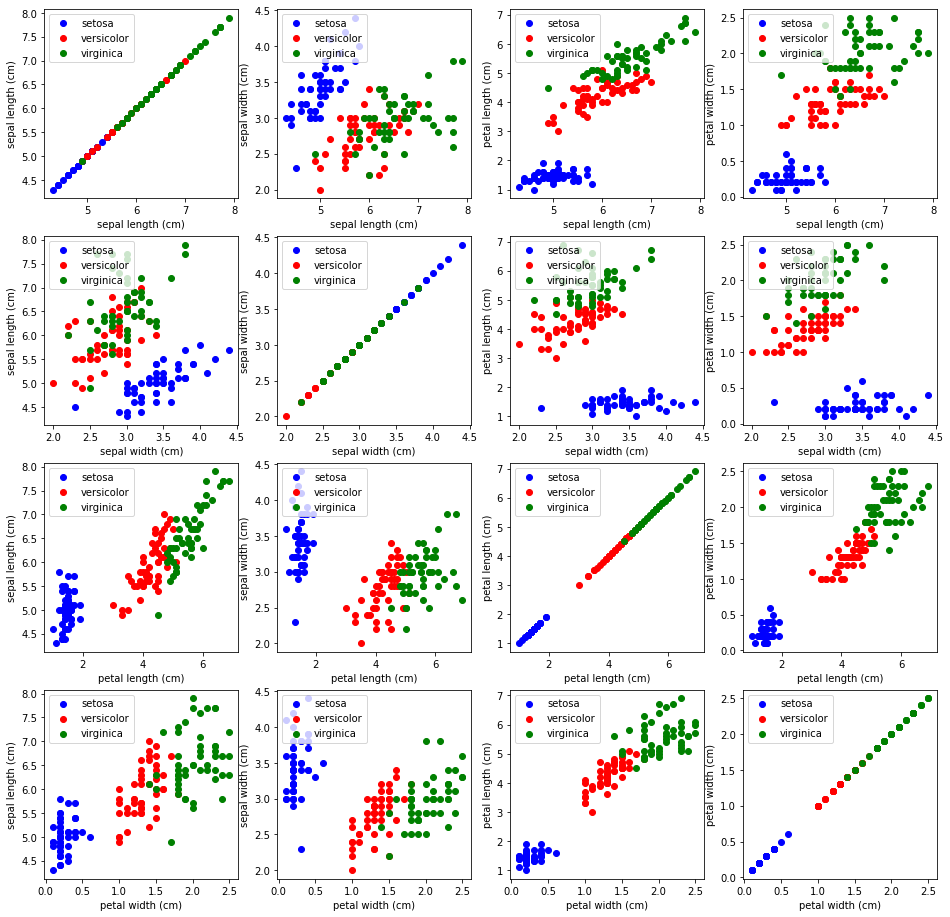

In [2]:
import matplotlib.pyplot as plt

n = len(iris.feature_names)
fig, ax = plt.subplots(n, n, figsize=(16, 16))

colors = ['blue', 'red', 'green']

for x in range(n):
    for y in range(n):
        xname = iris.feature_names[x]
        yname = iris.feature_names[y]
        for color_ind in range(len(iris.target_names)):
            ax[x, y].scatter(iris.data[iris.target==color_ind, x], 
                             iris.data[iris.target==color_ind, y],
                             label=iris.target_names[color_ind],
                             c=colors[color_ind])

        ax[x, y].set_xlabel(xname)
        ax[x, y].set_ylabel(yname)
        ax[x, y].legend(loc='upper left')


plt.show()

#Iris feature 별로 데이터의 특성을 확인하기 위해서 4가지 label에 대해 3종류의 Iris 분포를 그려봄
# (sepal length, sepal width, petal length, petal width)

In [3]:
# train_test_split 함수를 이용하여 train set과 test set으로 나누기
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(iris_data,
                                                    iris_label,
                                                    test_size=0.2,
                                                    random_state=7)

print(f'x_train 개수: {len(x_train)}, x_test 개수: {len(x_test)}')

x_train 개수: 120, x_test 개수: 30


In [4]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score


# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(x_train, y_train)
decision_tree_y_pred = decision_tree.predict(x_test)
print("# Decision Tree ========================================#\n", 
      classification_report(y_test, decision_tree_y_pred))

# RandomForest
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(x_train, y_train)
random_forest_y_pred = random_forest.predict(x_test)
print("# RandomForest ========================================#\n", 
      classification_report(y_test, random_forest_y_pred))

# SVM
svm_model = svm.SVC()
svm_model.fit(x_train, y_train)
svm_y_pred = svm_model.predict(x_test)
print("# SVM =================================================#\n", 
      classification_report(y_test, svm_y_pred))

# SGD
sgd_model = SGDClassifier()
sgd_model.fit(x_train, y_train)
sgd_y_pred = sgd_model.predict(x_test)
print("# SGD =================================================#\n", 
      classification_report(y_test, sgd_y_pred))

# Logistic Regression
logistic_model = LogisticRegression(max_iter=4096)
logistic_model.fit(x_train, y_train)
logistic_y_pred = logistic_model.predict(x_test)
print("# Logistic Regression ========================================#\n", 
      classification_report(y_test, logistic_y_pred))

# Decision Tree ========================================#
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.91      0.83      0.87        12
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30

# RandomForest ========================================#
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.83      0.83      0.83        12
           2       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30

# SVM =================================================#
               precision    recall  f1-score   support

        

# ♣ 2. Digits 분류하기

 * dataset 불러오기  
 * train set과 test set으로 나누기  
 * 모델 적용
 * 평가

In [5]:
# (1) 필요한 모듈 import
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt


# (2) 데이터 준비
digits = load_digits()
digits_data = digits.data
digits_label = digits.target

# shape는 배열의 형상 정보를 출력
print(digits_data.shape)

print(digits.DESCR)

(1797, 64)
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted 

In [6]:
print(np.all(digits.images.reshape((1797, 64)) == digits.data))

True


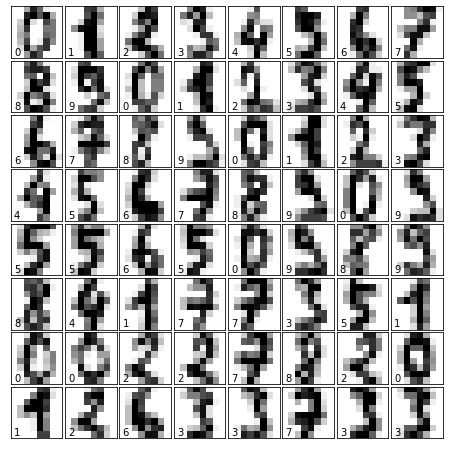

In [7]:
#digits 이미지 보기
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

*****

In [8]:
# (1) 필요한 모듈 import
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score


#===================================================================#
# from sklearn import datasets
# import matplotlib.pyplot as plt

# digits = datasets.load_digits()
# features = 'ash', 'color_intensity'
# features_index = [digits.feature_names.index(features[0]),
#                   digits.feature_names.index(features[1])]


# colors = ['blue', 'red', 'green']

# for label, color in zip(range(len(digits.target_names)), colors):
#     plt.scatter(digits.data[digits.target==label, features_index[0]], 
#                 digits.data[digits.target==label, features_index[1]],
#                 label=digits.target_names[label],
#                 c=color)

# plt.xlabel(features[0])
# plt.ylabel(features[1])
# plt.legend(loc='upper left')
# plt.show()
#===================================================================#


# (2) 데이터 준비
digits = load_digits()
digits_data = digits.data
digits_label = digits.target


# (3) train, test 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

# 정규화
x_train_norm, x_test_norm = x_train / np.max(x_train), x_test / np.max(x_test)

# (4) 모델 학습 및 예측
# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(x_train, y_train)
decision_tree_y_pred = decision_tree.predict(x_test)
print("# Decision Tree ========================================#\n", 
      classification_report(y_test, decision_tree_y_pred))

# RandomForest
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(x_train, y_train)
random_forest_y_pred = random_forest.predict(x_test)
print("# RandomForest ========================================#\n", 
      classification_report(y_test, random_forest_y_pred))

# SVM
svm_model = svm.SVC()
svm_model.fit(x_train, y_train)
svm_y_pred = svm_model.predict(x_test)
print("# SVM =================================================#\n", 
      classification_report(y_test, svm_y_pred))

# SGD
sgd_model = SGDClassifier()
sgd_model.fit(x_train, y_train)
sgd_y_pred = sgd_model.predict(x_test)
print("# SGD =================================================#\n", 
      classification_report(y_test, sgd_y_pred))

# Logistic Regression
logistic_model = LogisticRegression(max_iter=4096)
logistic_model.fit(x_train, y_train)
logistic_y_pred = logistic_model.predict(x_test)
print("# Logistic Regression ========================================#\n", 
      classification_report(y_test, logistic_y_pred))

# Decision Tree ========================================#
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360

# RandomForest ========================================#
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1   

In [9]:
print('Decision Tree       : {}'.format(recall_score(y_test, decision_tree_y_pred, average='weighted')))
print('Random Forest       : {}'.format(recall_score(y_test, random_forest_y_pred, average='weighted')))
print('SVM                 : {}'.format(recall_score(y_test, svm_y_pred, average='weighted')))
print('SGD                 : {}'.format(recall_score(y_test, sgd_y_pred, average='weighted')))
print('Logistic Regression : {}'.format(recall_score(y_test, logistic_y_pred, average='weighted')))

Decision Tree       : 0.8555555555555555
Random Forest       : 0.9638888888888889
SVM                 : 0.9888888888888889
SGD                 : 0.9222222222222223
Logistic Regression : 0.9527777777777777


# ♣ 3. Wine 분류하기

 * dataset 불러오기  
 * train set과 test set으로 나누기  
 * 모델 적용
 * 평가

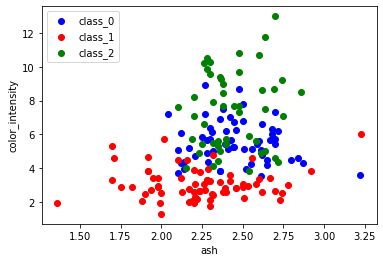

# Decision Tree ========================================#
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36

# RandomForest ========================================#
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

# SVM =================================================#
               precision    recall  f1-score   support

        

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regression ========================================#
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.94      1.00      0.97        17
           2       1.00      0.92      0.96        12

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



In [10]:
# (1) 필요한 모듈 import
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

#===============================================================#
from sklearn import datasets
import matplotlib.pyplot as plt

wine = datasets.load_wine()
features = 'ash', 'color_intensity'
features_index = [wine.feature_names.index(features[0]),
                  wine.feature_names.index(features[1])]


colors = ['blue', 'red', 'green']

for label, color in zip(range(len(wine.target_names)), colors):
    plt.scatter(wine.data[wine.target==label, features_index[0]], 
                wine.data[wine.target==label, features_index[1]],
                label=wine.target_names[label],
                c=color)

plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend(loc='upper left')
plt.show()
#=================================================================#

# (2) 데이터 준비
wines = load_wine()
wines_data = wines.data
wines_label = wines.target


# (3) train, test 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(wines_data, 
                                                    wines_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

# (4) 모델 학습 및 예측
# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(x_train, y_train)
decision_tree_y_pred = decision_tree.predict(x_test)
print("# Decision Tree ========================================#\n", 
      classification_report(y_test, decision_tree_y_pred))

# RandomForest
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(x_train, y_train)
random_forest_y_pred = random_forest.predict(x_test)
print("# RandomForest ========================================#\n", 
      classification_report(y_test, random_forest_y_pred))

# SVM
svm_model = svm.SVC()
svm_model.fit(x_train, y_train)
svm_y_pred = svm_model.predict(x_test)
print("# SVM =================================================#\n", 
      classification_report(y_test, svm_y_pred))

# SGD
sgd_model = SGDClassifier()
sgd_model.fit(x_train, y_train)
sgd_y_pred = sgd_model.predict(x_test)
print("# SGD =================================================#\n", 
      classification_report(y_test, sgd_y_pred))

# Logistic Regression
logistic_model = LogisticRegression(max_iter=4096)
logistic_model.fit(x_train, y_train)
logistic_y_pred = logistic_model.predict(x_test)
print("# Logistic Regression ========================================#\n", 
      classification_report(y_test, logistic_y_pred))

In [11]:
print('Decision Tree       : {}'.format(recall_score(y_test, decision_tree_y_pred, average='weighted')))
print('Random Forest       : {}'.format(recall_score(y_test, random_forest_y_pred, average='weighted')))
print('SVM                 : {}'.format(recall_score(y_test, svm_y_pred, average='weighted')))
print('SGD                 : {}'.format(recall_score(y_test, sgd_y_pred, average='weighted')))
print('Logistic Regression : {}'.format(recall_score(y_test, logistic_y_pred, average='weighted')))

Decision Tree       : 0.9444444444444444
Random Forest       : 1.0
SVM                 : 0.6111111111111112
SGD                 : 0.5277777777777778
Logistic Regression : 0.9722222222222222


# ♣ 4. Breast cancer 분류하기

 * dataset 불러오기  
 * train set과 test set으로 나누기  
 * 모델 적용
 * 평가

In [12]:
# (1) 필요한 모듈 import
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

# (2) 데이터 준비
breast_cancer = load_breast_cancer()
breast_cancer_data = breast_cancer.data
breast_cancer_label = breast_cancer.target

# (3) train, test 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(breast_cancer_data, 
                                                      breast_cancer_label, 
                                                      test_size=0.2, 
                                                      random_state=7)

# (4) 모델 학습 및 예측
# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(x_train, y_train)
decision_tree_y_pred = decision_tree.predict(x_test)
print("# Decision Tree ========================================#\n", 
      classification_report(y_test, decision_tree_y_pred))

# RandomForest
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(x_train, y_train)
random_forest_y_pred = random_forest.predict(x_test)
print("# RandomForest ========================================#\n", 
      classification_report(y_test, random_forest_y_pred))

# SVM
svm_model = svm.SVC()
svm_model.fit(x_train, y_train)
svm_y_pred = svm_model.predict(x_test)
print("# SVM =================================================#\n", 
      classification_report(y_test, svm_y_pred))

# SGD
sgd_model = SGDClassifier()
sgd_model.fit(x_train, y_train)
sgd_y_pred = sgd_model.predict(x_test)
print("# SGD =================================================#\n", 
      classification_report(y_test, sgd_y_pred))

# Logistic Regression
logistic_model = LogisticRegression(max_iter=4096)
logistic_model.fit(x_train, y_train)
logistic_y_pred = logistic_model.predict(x_test)
print("# Logistic Regression ========================================#\n", 
      classification_report(y_test, logistic_y_pred))

# Decision Tree ========================================#
               precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114

# RandomForest ========================================#
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

# SVM =================================================#
               precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.00      0.93        74

    acc

In [13]:
print('Decision Tree       : {}'.format(recall_score(y_test, decision_tree_y_pred, average='weighted')))
print('Random Forest       : {}'.format(recall_score(y_test, random_forest_y_pred, average='weighted')))
print('SVM                 : {}'.format(recall_score(y_test, svm_y_pred, average='weighted')))
print('SGD                 : {}'.format(recall_score(y_test, sgd_y_pred, average='weighted')))
print('Logistic Regression : {}'.format(recall_score(y_test, logistic_y_pred, average='weighted')))

Decision Tree       : 0.9122807017543859
Random Forest       : 1.0
SVM                 : 0.9035087719298246
SGD                 : 0.9035087719298246
Logistic Regression : 0.9473684210526315


# 결과 토의

* 모델의 성능을 평가하는 지표의 종류에 대해 이해하고, 활용 및 확인하여 보았다. 
* 지도학습과 비지도학습의 차이점과 머신러닝의 여러 가지 모델을 적용해 보고 결과를 얻는 과정을 수행하면서 데이터의 특성과 학습모델의 성격에 따라 다른 결과를 얻을 수 있음을 깨달을 수 있었다.  
* 어제의 나와 비교하여 한걸음 더 나아갈 수 있기를 바라면서 이번 과제를 마칩니다.